## FarmTech Solutions AI Projects

Objetivo do projeto é analisar dados referente a produção de quatro culturas (Cacau em grãos, Fruto de dendê (ou palma de óleo), Arroz em casca (ou arroz bruto), Borracha natural). para uma fazenda de médio porte, com 200 hectares (equivalente a aproximadamente 210 campos de futebol oficiais), que cultiva diversas culturas agrícolas.


Metas de entrega:
Fazer uma análise exploratória na base para se familiarizar com os dados;
Encontrar tendências para os rendimentos das plantações, por meio de clusterizações, e identificar se existem cenários discrepantes (outliers);
Fazer cinco modelos preditivos (cada um com um algoritmo diferente, conforme visto no capítulo “Modelagem de Dados com Regressão Supervisionada”) que, dadas as condições, prevejam qual será o rendimento da safra

In [ ]:
# Importação das bibliotecas necessárias.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Importação do arquivo csv que contém os dados para análise.

df = pd.read_csv('crop_yield.csv')

Analise Exploratória dos Dados, com verificação do número de linhas, primeiro 5 linhas, finalizando com uma analise descritiva das variáveis.

In [ ]:
num_linhas = len(df)
print(f'O número total de linhas no arquivo crop_yield.csv é: {num_linhas}')

O número total de linhas no arquivo crop_yield.csv é: 156


In [ ]:
print('Head do DataFrame:')
df.head()

Head do DataFrame:


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


# Análise Descritiva das Variáveis:
Precipitation (mm day⁻¹): Quantidade média de chuva por dia.

Specific Humidity at 2 Meters (g/kg): Quantidade de vapor de água presente no ar a 2 metros de altura.

Relative Humidity at 2 Meters (%): Umidade relativa do ar a 2 metros de altura.

Temperature at 2 Meters (°C): Temperatura do ar a 2 metros de altura.

Yield: Rendimento de arroz (quantidade produzida).

In [ ]:
df.describe()

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


# Utilizando algoritmo KMeans realizado analise de clusterização da variavel Temperature at 2 Meters.

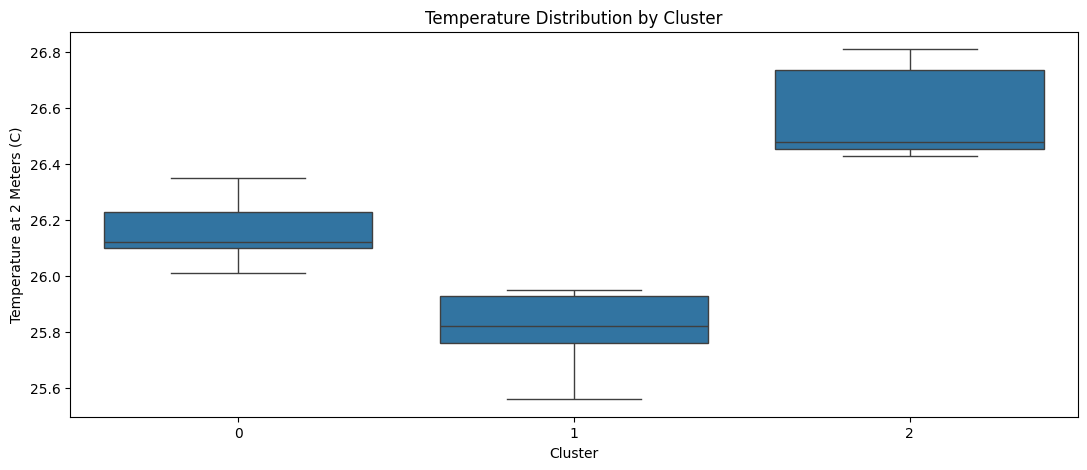

In [ ]:
numerical_features = ['Temperature at 2 Meters (C)']  #
df_cluster = df[numerical_features].copy()

for col in df_cluster.columns:
    if pd.api.types.is_object_dtype(df_cluster[col]):
        try:
            df_cluster[col] = pd.to_numeric(df_cluster[col])
        except ValueError:
            print(f"Could not convert column '{col}' to numeric.  Remove or preprocess this column.")
            exit()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
df_scaled = pd.DataFrame(df_scaled, columns=numerical_features)

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

cluster_summary = df.groupby('Cluster')[numerical_features].mean()
#print("\nCluster Summary (Temperature Only):")
#print(cluster_summary)

plt.figure(figsize=(13, 5))
sns.boxplot(x='Cluster', y='Temperature at 2 Meters (C)', data=df)
plt.title('Temperature Distribution by Cluster')
plt.show()

Interpretação dos Clusters:

 - Cluster 0: Temperatura média: 26.1488°C
 - Cluster 1: Temperatura média: 25.8067°C
 - Cluster 2: Temperatura média: 26.5750°C

Abaixo dispomos de uma clusterização da analise de temperatura e produtividade. É possível verificar que existe uma produtividade maior nas temperaturas entre 26,0C e 26,4C.

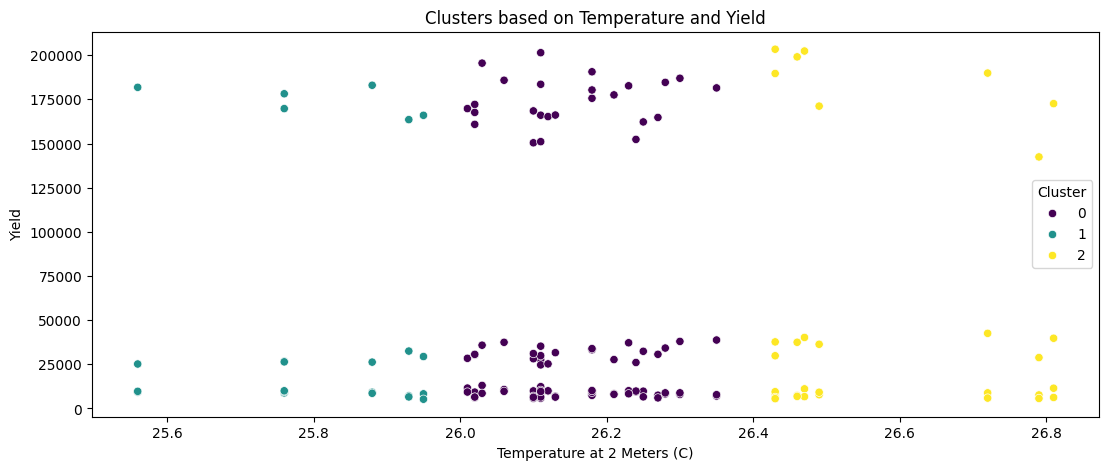

In [ ]:
plt.figure(figsize=(13, 5))
sns.scatterplot(x='Temperature at 2 Meters (C)', y='Yield', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters based on Temperature and Yield')
plt.show()

# Analise de correlações
 - Correlação por Tipo de Cultivo - Precipitação

 Precipitação: Embora a correlação geral seja fraca (0.019), cultivos específicos como arroz (0.329) e óleo de palma (0.222) mostram correlações positivas mais significativas.

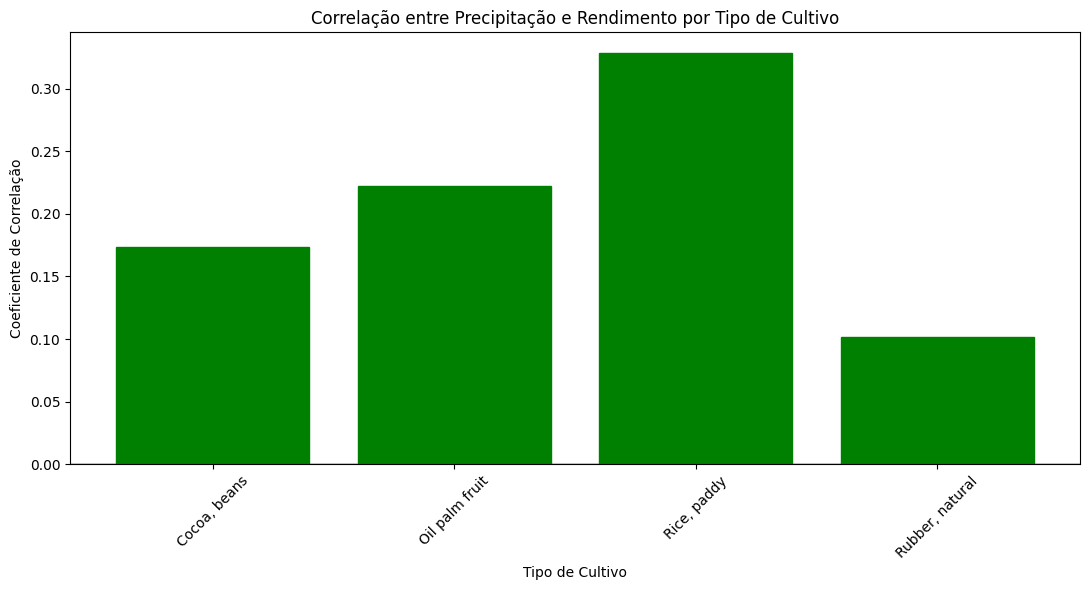

In [ ]:
precipitation_yield_corr = df['Precipitation (mm day-1)'].corr(df['Yield'])

# Calculando a correlação por tipo de cultivo
crop_correlations_precip = {}
for crop in df['Crop'].unique():
    crop_data = df[df['Crop'] == crop]
    if len(crop_data) > 1:  # Precisa de pelo menos 2 pontos para calcular correlação
        corr = crop_data['Precipitation (mm day-1)'].corr(crop_data['Yield'])
        crop_correlations_precip[crop] = corr

plt.figure(figsize=(11, 6))
crops = list(crop_correlations_precip.keys())
correlations = list(crop_correlations_precip.values())
bars = plt.bar(crops, correlations)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Correlação entre Precipitação e Rendimento por Tipo de Cultivo')
plt.xlabel('Tipo de Cultivo')
plt.ylabel('Coeficiente de Correlação')
plt.xticks(rotation=45)
plt.tight_layout()

for i, bar in enumerate(bars):
    if correlations[i] > 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

plt.show()

 - Correlação por Tipo de Cultivo - Temperatura

 A correlação com arroz é fortemente positiva (0.609), enquanto borracha natural apresenta correlação negativa (-0.407), indicando que diferentes cultivos respondem de maneiras opostas às variações de temperatura.


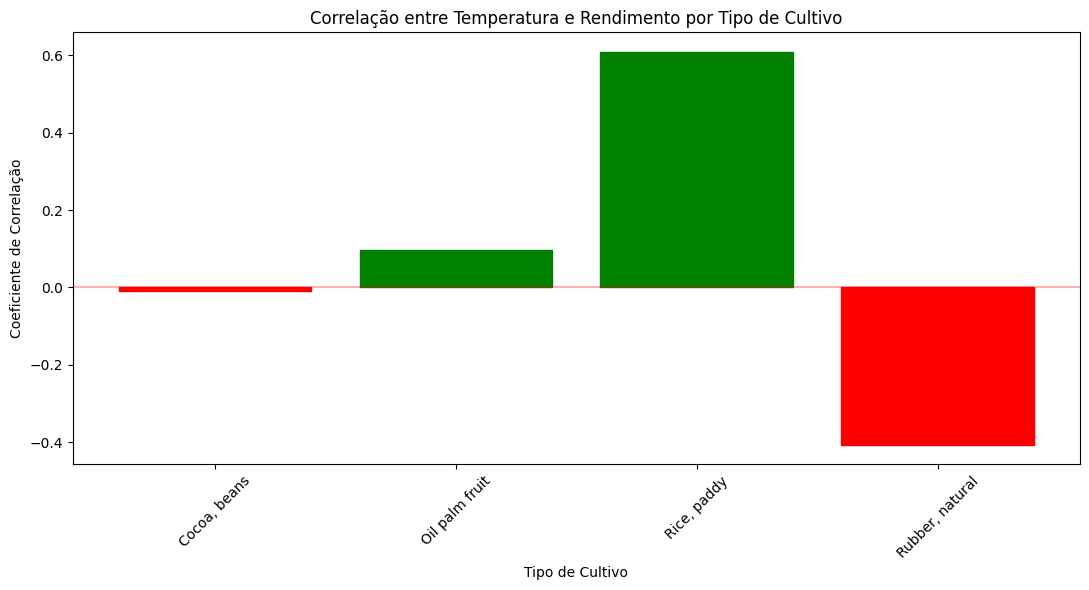

In [ ]:
temperature_yield_corr = df['Temperature at 2 Meters (C)'].corr(df['Yield'])

crop_correlations_temp = {}
for crop in df['Crop'].unique():
    crop_data = df[df['Crop'] == crop]
    if len(crop_data) > 1:
        corr = crop_data['Temperature at 2 Meters (C)'].corr(crop_data['Yield'])
        crop_correlations_temp[crop] = corr

plt.figure(figsize=(11, 6))
crops = list(crop_correlations_temp.keys())
correlations = list(crop_correlations_temp.values())
bars = plt.bar(crops, correlations)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.title('Correlação entre Temperatura e Rendimento por Tipo de Cultivo')
plt.xlabel('Tipo de Cultivo')
plt.ylabel('Coeficiente de Correlação')
plt.xticks(rotation=45)
plt.tight_layout()

for i, bar in enumerate(bars):
    if correlations[i] > 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

plt.show()

## Modelagem de Dados com Regressão Supervisionada

Nesta etapa é realizado modelagem com Machine Learning nos dados para prediçao da produtividade da cultura Arroz, utilizando como variaveis independentes Precipitation (mm day-1) e Specific Humidity at 2 Meters (g/kg).

Foram utilizados os seguinte modelos:
1. Regressão Linear
2. Árvore de Decisão
3. Random Forest
4. SVM (Regressão de Vetor de Suporte)
5. Gradient Boosting


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Filtrando apenas os dados de "Rice, paddy"
df_rice = df[df['Crop'] == 'Rice, paddy']

# Separando features (X) e target (y)
X = df_rice[['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)',
             'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)']]
y = df_rice['Yield']

# Dividindo em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Regressão Linear
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

# 2. Árvore de Decisão
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))

# 3. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))

# 4. SVM (Regressão de Vetor de Suporte)
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_r2 = r2_score(y_test, svm_pred)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))

# 5. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_pred)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_pred))

# Exibindo os resultados
print("Resultados dos Modelos para Arroz (Rice, paddy) - Todas as Variáveis:")
print(f"1. Regressão Linear - R²: {lr_r2:.3f}, RMSE: {lr_rmse:.2f}")
print(f"2. Árvore de Decisão - R²: {dt_r2:.3f}, RMSE: {dt_rmse:.2f}")
print(f"3. Random Forest - R²: {rf_r2:.3f}, RMSE: {rf_rmse:.2f}")
print(f"4. SVM - R²: {svm_r2:.3f}, RMSE: {svm_rmse:.2f}")
print(f"5. Gradient Boosting - R²: {gb_r2:.3f}, RMSE: {gb_rmse:.2f}")

# Exemplo de previsão com novos dados
novos_dados = pd.DataFrame({
    'Precipitation (mm day-1)': [2500],
    'Specific Humidity at 2 Meters (g/kg)': [18],
    'Relative Humidity at 2 Meters (%)': [85],
    'Temperature at 2 Meters (C)': [26]
})

# Previsão com o modelo Random Forest (exemplo)
previsao = rf_model.predict(novos_dados)
print(f"Previsão de rendimento de arroz com Random Forest: {previsao[0]:.2f}")

Resultados dos Modelos para Arroz (Rice, paddy) - Todas as Variáveis:
1. Regressão Linear - R²: 0.390, RMSE: 3640.99
2. Árvore de Decisão - R²: -0.651, RMSE: 5989.02
3. Random Forest - R²: 0.007, RMSE: 4644.27
4. SVM - R²: -0.059, RMSE: 4795.70
5. Gradient Boosting - R²: -0.463, RMSE: 5638.10
Previsão de rendimento de arroz com Random Forest: 28641.45


A análise dos resultados para a previsão de rendimento de arroz (Rice, paddy) indica que:

Regressão Linear teve o melhor desempenho entre os modelos testados, com um R² de 0.390 e RMSE de 3640.99. Apesar de ser o melhor, o R² ainda é relativamente baixo, sugerindo que o modelo explica apenas 39% da variabilidade dos dados.

Árvore de Decisão e Gradient Boosting tiveram desempenhos ruins, com R² negativo, indicando que esses modelos são piores do que usar a média dos dados para previsão. O RMSE alto também confirma a baixa precisão.

Random Forest e SVM também tiveram desempenho insatisfatório, com R² próximo de zero ou negativo, indicando que não conseguiram capturar adequadamente a relação entre as variáveis.

A previsão de rendimento de arroz feita pelo Random Forest foi de 28641.45, mas, dado o baixo desempenho geral do modelo, essa previsão pode não ser confiável.

Conclusão: A Regressão Linear foi o modelo menos pior, mas todos os modelos apresentaram limitações significativas, o ideal seria dispormos de mais dados para a analise, com um dataframe maior teríamos uma capacidade de obter melhores resultados.